# Predict the churn

The dataset contains information about customers' usage of a service and whether they churned (left the service) or not. Here is a brief overview of the columns:

* Call Failure: Number of call failures.
* Complains: Number of complaints.
* Subscription Length: The length of the subscription in months.
* Charge Amount: The amount of charge.
* Seconds of Use: The total seconds of use.
*Frequency of use: How frequently the service is used.
* Frequency of SMS: How frequently SMS is used.
* Distinct Called Numbers: The number of distinct numbers called.
* Age Group: Age group of the customer.
* Tariff Plan: The tariff plan of the customer.
* Status: The status of the customer.
* Age: The age of the customer.
* Customer Value: The customer value.
* Churn: Whether the customer churned or not. 1 indicates churn, 0 indicates no churn.


From the Churn distribution, it's evident that the dataset is imbalanced, with a larger number of customers who did not churn. When training our model, we need to ensure that it doesn't become biased towards predicting the majority class.

The Age Group distribution shows that most of the customers belong to the first two age groups.



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:


# Load the data
data = pd.read_csv('/Users/robin/Desktop/my_projects/buyerforecaster/notebook/data/Customer Churn.csv')

In [15]:
# Checking for missing values
data.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

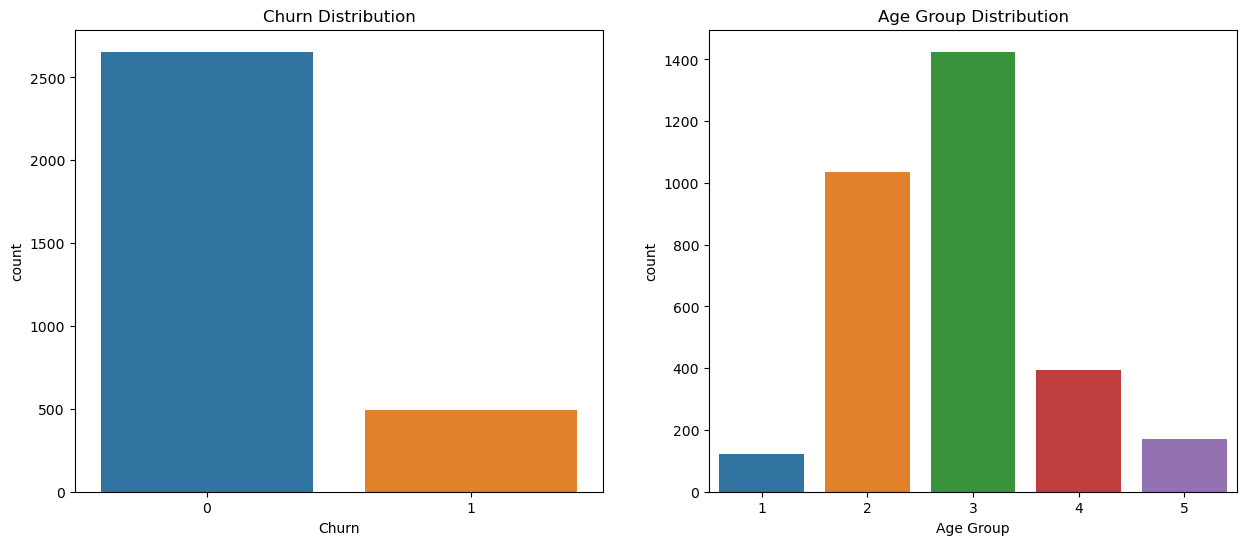

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Plot the graph for churn
sns.countplot(x="Churn", data=data, ax=axes[0])
axes[0].set_title('Churn Distribution')

# Plot the graph for Age Group
sns.countplot(x="Age Group", data=data, ax=axes[1])
axes[1].set_title('Age Group Distribution')

plt.show()


From the Churn distribution, it's evident that the dataset is imbalanced, with a larger number of customers who did not churn. When training our model, we need to ensure that it doesn't become biased towards predicting the majority class.

The Age Group distribution shows that most of the customers belong to the first two age groups.

Let's further explore the data by looking at the correlation between different features. This can help us understand if there are any highly correlated features that might need to be addressed before modeling, and also give insights into the relationships between the features and the target variable.

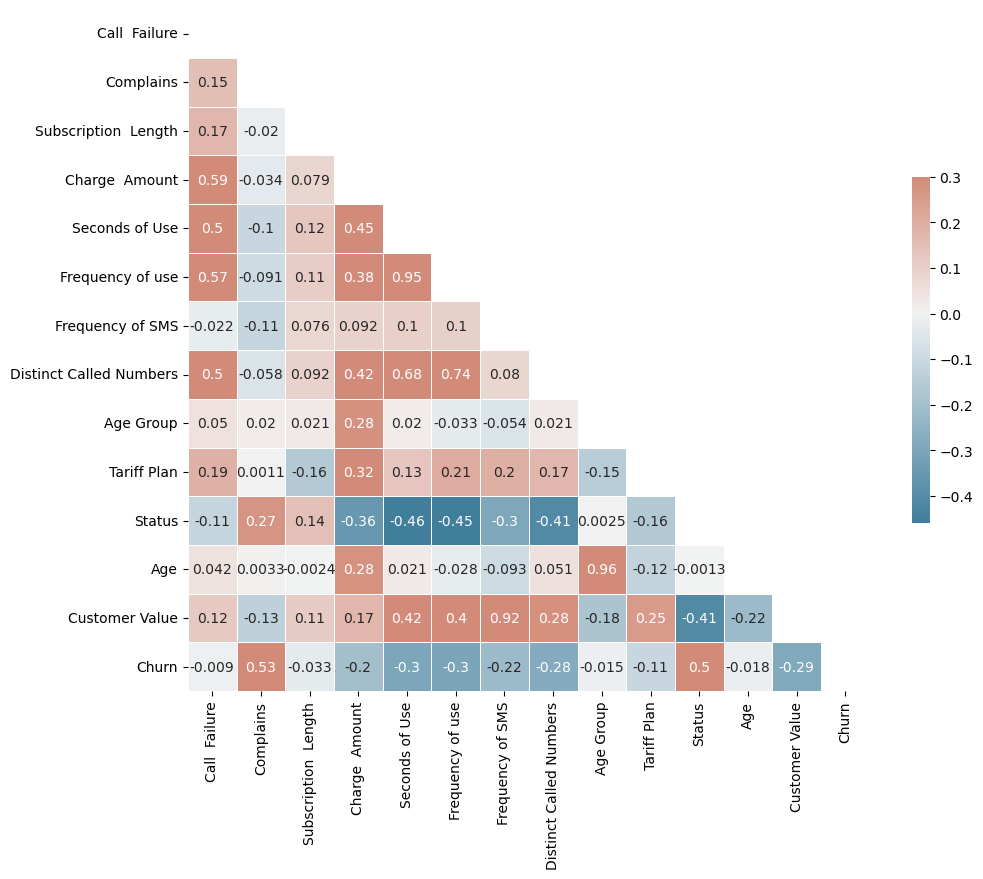

In [14]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()



In [ ]:
import numpy as np

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

Frequency of use, Seconds of Use, Distinct Called Numbers, and Customer Value show a moderate positive correlation with Churn. This suggests that customers who use the service more frequently, for longer durations, call more distinct numbers, and have higher customer values are more likely to churn. This might be counterintuitive initially but could indicate that these customers have high expectations and are not satisfied with the service.

Subscription Length and Age have a moderate negative correlation with Churn. This indicates that customers who have been subscribed for longer periods and older customers are less likely to churn, suggesting they are more satisfied with the service or less likely to change.

Call Failure also shows a positive correlation with Churn, indicating that customers experiencing more call failures are more likely to churn, which makes sense as call failures could lead to customer dissatisfaction.

Among the features, there are some with high correlation such as Subscription Length and Age, Frequency of use and Seconds of Use, Frequency of use and Distinct Called Numbers, Frequency of use and Customer Value. This is expected as these pairs of features are likely to be related.

In [17]:
from sklearn.model_selection import train_test_split

# Define the feature set X and the target y
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2520, 13), (630, 13), (2520,), (630,))

In [20]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the shapes after SMOTE
X_train_smote.shape, y_train_smote.shape


((4248, 13), (4248,))

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest Classifier with balanced class weights
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.90      0.89      0.89        99

    accuracy                           0.97       630
   macro avg       0.94      0.94      0.94       630
weighted avg       0.97      0.97      0.97       630



The classification report shows the precision, recall, f1-score, and support for each class, as well as the accuracy of the model. Here's a brief overview of these metrics:

Precision: Out of all the instances that the model predicted as positive, how many were actually positive. For class 0 (no churn), it's 0.98, and for class 1 (churn), it's 0.90.

Recall: Out of all the actual positive instances, how many were correctly predicted by the model. For class 0 (no churn), it's 0.98, and for class 1 (churn), it's 0.89.

F1-Score: It's the harmonic mean of precision and recall and provides a balance between the two. It can be more useful than accuracy, especially for imbalanced classes. For class 0 (no churn), it's 0.98, and for class 1 (churn), it's 0.89.

Support: It's the number of actual occurrences of the class in the test data set. For class 0 (no churn), it's 531, and for class 1 (churn), it's 99.

Accuracy: It's the ratio of correct predictions to the total predictions. The overall accuracy of the model is 0.97.

Overall, the Random Forest Classifier with balanced.